In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import torch
from logd_pka_calculator.models.chemprop import single_task_model_train, single_task_model_predict
from logd_pka_calculator.visualization.visualize import regression_model

# Using GPU to make training and predictions much faster
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using device: mps


In [11]:
# Training model
single_task_model_train()

# Predictions on test set
X_test = pd.read_csv("../data/processed/test_data_chemprop.csv").SMILES.to_list()
y_preds = single_task_model_predict(X_test)

# Chemprop is very verbose

Command line
python /Users/jonswain/miniforge3/envs/logd_pka_calculator/lib/python3.10/site-packages/ipykernel_launcher.py --f=/Users/jonswain/Library/Jupyter/runtime/kernel-v2-93416spSmvf4bP6oK.json
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': [],
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bond_descriptors_size': 0,
 'bond_features_size': 0,
 'bond_targets': [],
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'constraints_path': None,


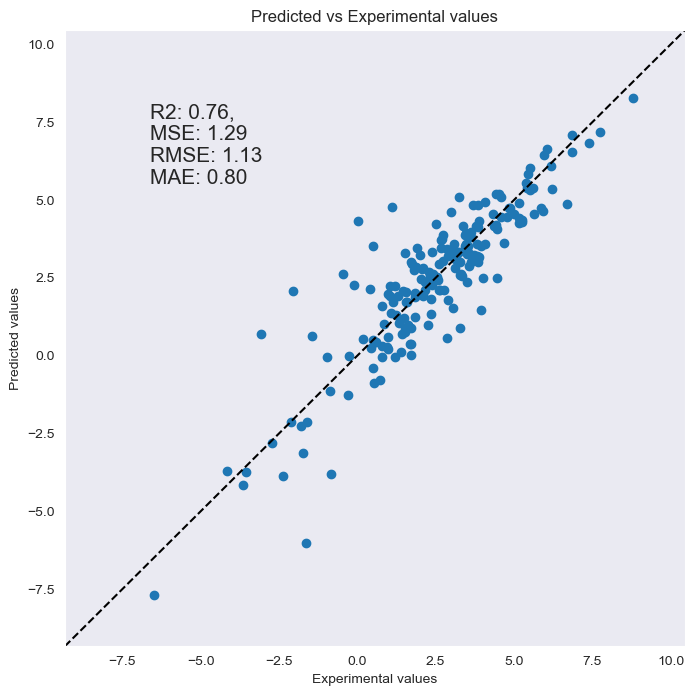

In [10]:
y_true = pd.read_csv("../data/processed/test_data_chemprop.csv").logd_x
regression_model(np.array(y_true), y_preds[:, 0])